1. Load the data from the competition, removing any possible meaningless column.
2. The "Series Code" column contains codes with segments separated by periods ".". Suppose that the first segment represents some global "category". How many unique categories are?
3. Write a function that receives a country name and returns a pandas DataFrame indexed by year with all the series as columns. Write another similar function that receives a series name and returns the countries.
4. Plot the "Alternative and nuclear energy (% of total energy use)" of your three countries in the same plot, as well as a centered, 3 year rolling mean.
5. Which are the 8 countries with the largest "Electricity production from coal sources (kWh)"? Plot the series for those 8 countries.
6. Among the countries that had a nonzero "Electricity production from coal sources (kWh)" in each of the last 5 years of the dataset, which are the 8 ones that had the biggest percentual increase in those last 5 years? Plot the series for those 8 countries.
7. Pick some health or development indicators of your choice. "Is the world doing better or worse?". Discuss, compare different countries and/or continents, correlate with other indexes.

Questions 1 to 6 are worth 0.5 points each, question 7 is totally open (no correct answers) and is worth 2 points, which will include overall presentation and aesthetics. 

1. Load the data from the competition, removing any possible meaningless column.

In [13]:
import os
import pandas as pd
import numpy as np
data = pd.read_csv("/Users/allison/Desktop/BTSMBDS/Data Science Foundations/data/TrainingSet.csv").dropna().drop(["Unnamed: 0"], axis = 1)

In [15]:
data.head()

,1972 [YR1972],1973 [YR1973],1974 [YR1974],1975 [YR1975],1976 [YR1976],1977 [YR1977],1978 [YR1978],1979 [YR1979],1980 [YR1980],1981 [YR1981],...,2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],Country Name,Series Code,Series Name
20,2.257446e+06,2.577942e+06,3.328705e+06,4.087907e+06,4.086801e+06,5.291039e+06,5.175389e+06,5.883546e+06,5.102752e+06,6.364148e+06,...,4.539497e+06,2.598783e+06,4.355656e+06,5.699296e+06,8.245873e+06,1.133449e+07,1.753380e+07,Afghanistan,NY.ADJ.DCO2.CD,Adjusted savings: carbon dioxide damage (curre...
26,2.233065e+07,2.654146e+07,6.606462e+07,6.882184e+07,6.463635e+07,7.252207e+07,8.584604e+07,1.121651e+08,1.638508e+08,1.732730e+08,...,1.205094e+06,9.835384e+04,2.049705e+05,6.564596e+05,4.838278e+05,5.607931e+05,5.495978e+06,Afghanistan,NY.ADJ.DNGY.CD,Adjusted savings: energy depletion (current US$)
28,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Afghanistan,NY.ADJ.DMIN.CD,Adjusted savings: mineral depletion (current US$)
31,3.633483e+07,3.876103e+07,4.837836e+07,6.899526e+07,7.809190e+07,8.131705e+07,8.492192e+07,1.126985e+08,1.245812e+08,8.876818e+07,...,6.499022e+07,9.221123e+07,1.002298e+08,8.858682e+07,8.862863e+07,1.330467e+08,1.851871e+08,Afghanistan,NY.ADJ.DFOR.CD,Adjusted savings: net forest depletion (curren...
34,1.496240e+02,1.505446e+02,1.514652e+02,1.523858e+02,1.533064e+02,1.542270e+02,1.553466e+02,1.564662e+02,1.575858e+02,1.587054e+02,...,1.544154e+02,1.505050e+02,1.438986e+02,1.372922e+02,1.306858e+02,1.240794e+02,1.174730e+02,Afghanistan,SP.ADO.TFRT,"Adolescent fertility rate (births per 1,000 wo..."


In [ ]:
#We now know that there are almost 200,000 rows in this dataset, and 40 datapoints. There are many missing data points in the dataset. 

2. The "Series Code" column contains codes with segments separated by periods ".". Suppose that the first segment represents some global "category". How many unique categories are?

In [7]:
#splitting the Series Code column into two: Global Category and Other Category

data[['Global Category','Other Category']] = data.pop('Series Code').str.split('.', n=1, expand=True)

In [8]:
data['Global Category'].nunique()

62

In [ ]:
#There are 62 unique categories

3. Write a function that receives a country name and returns a pandas DataFrame indexed by year with all the series as columns. Write another similar function that receives a series name and returns the countries.

In [16]:
def series_in_country(country_name):

    data_new = data.loc[data['Country Name'] == country_name].set_index(['Series Name']).T
    data_new.index = data_new.index.str[0:5].astype(str)
    data_new.index.name = 'Year'
    
    return data_new

series_in_country('Australia')


Series Name,Adjusted net national income (annual % growth),Adjusted net national income (constant 2005 US$),Adjusted net national income (current US$),Adjusted net national income per capita (annual % growth),Adjusted net national income per capita (constant 2005 US$),Adjusted net national income per capita (current US$),"Adjusted net savings, excluding particulate emission damage (% of GNI)","Adjusted net savings, excluding particulate emission damage (current US$)",Adjusted savings: carbon dioxide damage (% of GNI),Adjusted savings: carbon dioxide damage (current US$),...,Terms of trade adjustment (constant LCU),Total natural resources rents (% of GDP),"Total reserves (includes gold, current US$)",Total reserves minus gold (current US$),Trade (% of GDP),"Trademark applications, total",Urban population,Urban population (% of total),Urban population growth (annual %),Wholesale price index (2010 = 100)
Year,,,,,,,,,,,,,,,,,,,,,
1972,5.70532,2.08129e+11,4.27464e+10,3.78006,15794.9,3244.02,17.5921,9.13328e+09,0.446749,2.31939e+08,...,-2.28014e+10,2.1825,6.33977e+09,5.85951e+09,24.8193,9204,1.12699e+07,85.5274,1.99166,13.4414
1973,5.37159,2.19309e+11,5.26114e+10,3.7729,16390.8,3932.09,17.9849,1.15094e+10,0.420229,2.68925e+08,...,-1.83193e+10,2.9862,6.21382e+09,5.38642e+09,25.1998,10026,1.14611e+07,85.6586,1.68211,14.6032
1974,2.64034,2.25099e+11,7.27916e+10,0.0748926,16403.1,5304.35,16.5049,1.46594e+10,0.336813,2.99151e+08,...,-1.50377e+10,4.24791,5.32903e+09,3.95304e+09,26.3772,9209,1.17729e+07,85.7898,2.68426,16.8359
1975,0.784712,2.26865e+11,8.0096e+10,-0.448527,16329.5,5765.2,12.9303,1.26245e+10,0.346245,3.38056e+08,...,-1.95963e+10,4.06867,3.98982e+09,2.95477e+09,29.0158,9046,1.1937e+07,85.921,1.38401,19.3716
1976,2.40162,2.32314e+11,8.63855e+10,1.38001,16554.8,6155.88,13.0464,1.37246e+10,0.340583,3.58289e+08,...,-2.18477e+10,4.45941,3.8621e+09,2.8698e+09,26.9045,10195,1.20528e+07,85.8888,0.965168,21.5639
1977,1.13914,2.3496e+11,8.92716e+10,0.00603185,16555.8,6290.27,11.4863,1.26037e+10,0.37873,4.15574e+08,...,-2.44657e+10,4.72994,3.31931e+09,2.0576e+09,28.6711,10888,1.21848e+07,85.8566,1.08918,23.7561
1978,0.353743,2.35791e+11,9.61898e+10,-0.806496,16422.3,6699.39,10.2567,1.20239e+10,0.412917,4.84061e+08,...,-2.79807e+10,4.089,3.82237e+09,2.0616e+09,28.219,11001,1.23227e+07,85.8244,1.12537,25.711
1979,1.31949,2.38903e+11,1.06825e+11,0.230487,16460.2,7360.16,10.1589,1.35601e+10,0.403432,5.38503e+08,...,-2.9749e+10,6.41184,5.48601e+09,1.42432e+09,29.6742,16127,1.24519e+07,85.7922,1.04312,29.5095
1980,3.71146,2.4777e+11,1.18507e+11,2.45495,16864.2,8066.08,10.6584,1.58477e+10,0.430402,6.39949e+08,...,-3.05894e+10,6.87208,6.36646e+09,1.68996e+09,32.3486,13567,1.25999e+07,85.76,1.1814,33.6465


In [31]:
def countries_in_series(series_name):
    
    return 'The countries that have this goal are: ', data.loc[data['Series Name'] == series_name, 'Country Name']

countries_in_series('Adjusted net national income (constant 2005 US$)')

#but how can i make the output look better?

('The countries that have this goal are: ', 2104                  Algeria
 8252                Australia
 9093                  Austria
 15957                 Belgium
 17921                   Benin
 20551                 Bolivia
 24071                  Brazil
 27212            Burkina Faso
 31657                Cameroon
 32858                  Canada
 35968                   Chile
 38059                Colombia
 40174        Congo, Dem. Rep.
 41294             Congo, Rep.
 42430              Costa Rica
 43568           Cote d'Ivoire
 45673                    Cuba
 48227                 Denmark
 50978      Dominican Republic
 52184                 Ecuador
 53387        Egypt, Arab Rep.
 54587             El Salvador
 60759                 Finland
 61634                  France
 62897                   Gabon
 63970             Gambia, The
 66231                 Germany
 68349                  Greece
 70502               Guatemala
 75783                Honduras
                  ...      

4. Plot the "Alternative and nuclear energy (% of total energy use)" of your three countries in the same plot, as well as a centered, 3 year rolling mean.

In [38]:
import matplotlib.pyplot as plt

def plotter(country1, country2, country3, series_name):
    data_new = data.loc[((data['Country Name'] == country1)|(data['Country Name'] == country2)|(data['Country Name'] == country3)) & (data['Series Name']==series_name)].set_index(['Series Code']).T
    data_new.index = data_new.index.str[0:5].astype(str)
    data_new.index.name = 'Year'
    return data_new

Text(0.5,1,'Alternative and nuclear energy usage in Australia, Turkey and Spain')

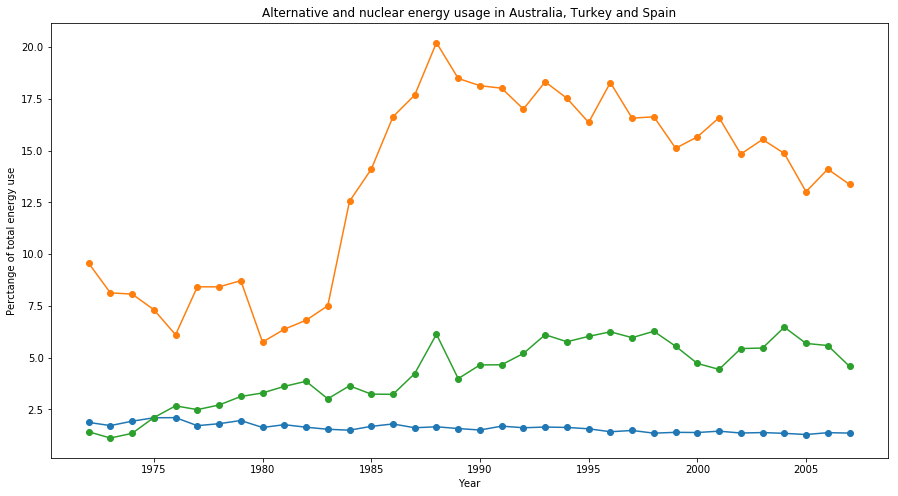

In [39]:
data_plotter = plotter("Australia", "Turkey", "Spain", "Alternative and nuclear energy (% of total energy use)" )

data_plotter.drop(data_plotter.tail(2).index,inplace=True)
data_plotter.index = data_plotter.index.astype(int)

data_plotter.plot(legend = False, figsize = (15, 8), style="-o");
plt.xlabel('Year')
plt.ylabel('Perctange of total energy use')
plt.title('Alternative and nuclear energy usage in Australia, Turkey and Spain')

#how to include an appropriate legend? Ie. countries

In [37]:
data_plotter

Series Code,EG.USE.COMM.CL.ZS,EG.USE.COMM.CL.ZS,EG.USE.COMM.CL.ZS
Year,,,
1972,1.87181,9.56525,1.42012
1973,1.71997,8.12863,1.1181
1974,1.93077,8.07096,1.34412
1975,2.09709,7.31891,2.10579
1976,2.10287,6.10673,2.67164
1977,1.7152,8.4221,2.4907
1978,1.81007,8.41994,2.71321
1979,1.96421,8.71978,3.12491
1980,1.62705,5.75061,3.29524


5. Which are the 8 countries with the largest "Electricity production from coal sources (kWh)"? Plot the series for those 8 countries.

In [71]:
def top_eight(series_name):
    
    data2 = data.loc[data['Series Name'] == series_name]
    data2['sum'] = data2.loc[:, '1972 [YR1972]':'2007 [YR2007]'].sum(1)
    data2 = data2.nlargest(8, columns='sum', keep='first').set_index(['Country Name']).T
    data2.index = data2.index.str[0:5].astype(str)
    data2.index.name = 'Year'
    data2.drop(data2.tail(2).index,inplace=True)
    
    return data2
    
top_eight('Electricity production from coal sources (kWh)')

#Ok in the above we create a new dataframe that includes only data for the relevant series name, 
#then creates a new column that sums all of the values across the years.
#Then the function returns the data for the 8 countries with the highest values in the new 'sum' column.


/Users/allison/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Country Name,United States,China,Germany,India,United Kingdom,South Africa,Japan,Poland
Year,,,,,,,,
1972,8.2497e+11,9.7753e+10,2.50348e+11,3.6681e+10,1.45241e+11,5.8684e+10,4.16e+10,7.0226e+10
1973,9.0736e+11,9.7713e+10,2.58316e+11,3.5958e+10,1.74609e+11,6.3405e+10,3.73e+10,7.8788e+10
1974,8.64682e+11,9.6845e+10,2.62491e+11,4.1039e+10,1.48831e+11,6.851e+10,3.9761e+10,8.6185e+10
1975,8.90852e+11,1.10665e+11,2.42829e+11,4.4111e+10,1.69468e+11,7.3774e+10,4.2317e+10,9.1623e+10
1976,9.87113e+11,1.0436e+11,2.78488e+11,5.1775e+10,1.79867e+11,7.7453e+10,4.377e+10,9.8756e+10
1977,1.02945e+12,1.28181e+11,2.71197e+11,5.2427e+10,1.82507e+11,7.8366e+10,4.7277e+10,1.03538e+11
1978,1.01935e+12,1.58652e+11,2.80637e+11,5.3218e+10,1.88178e+11,8.2576e+10,4.7398e+10,1.09178e+11
1979,1.12479e+12,1.63493e+11,2.89628e+11,5.6271e+10,2.02879e+11,8.8587e+10,5.0345e+10,1.10585e+11
1980,1.24287e+12,1.64149e+11,2.93514e+11,6.1463e+10,2.07896e+11,9.7925e+10,5.4935e+10,1.14547e+11


/Users/allison/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


6. Among the countries that had a nonzero "Electricity production from coal sources (kWh)" in each of the last 5 years of the dataset, which are the 8 ones that had the biggest percentual increase in those last 5 years? Plot the series for those 8 countries.

7. Pick some health or development indicators of your choice. "Is the world doing better or worse?". Discuss, compare different countries and/or continents, correlate with other indexes.